In [65]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1. Explain the dataset

In [80]:
# Loading the csv file into a pandas dataframe.
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


This dataset contains the following data

there is 200 rows and 5 features. this dataset has TV, Radio, Newspaper, Sales and a unnamed features.

we can see that there is feature called unnamed it is the index values so we don't need that , we can remove it.

In [4]:
# remove the unwanted feature
df1 = df.drop('Unnamed: 0', axis=1)
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# Calculating the null values present in each columns in the dataset
df1.isna().sum() # or you can use df.isnull().sum() as well

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

As you can see that, there is no missing values present in the dataset. so we can move to the questions

### 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [6]:
# statistical summary of the data
df1.describe().T # diagonal by writing rows as columns 

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


This is the complete statisticsl summary of the data. we can also use the seperate summary of each data.

In [24]:
# Maximum values present in the dataset
print('Maximum values present in the dataset : \n',np.max(df1))

Maximum values present in the dataset : 
 TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64


In [25]:
# Minimum values present in the dataset
print('Minimum values present in the dataset : \n',np.min(df1))

Minimum values present in the dataset : 
 TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64


In [26]:
# Average values present in the dataset
print('Average values present in the dataset : \n',df1.mean())

Average values present in the dataset : 
 TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64


In [10]:
# Median values present in the dataset
print('Median values present in the dataset : ',df1.median())

Median values present in the dataset :  TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64


In [27]:
#Compute the q-th percentile of the data along the specified axis

#25th percentile
print('25th percentile of TV: ',np.percentile(df1['TV'],25))
print('25th percentile of Radio: ',np.percentile(df1['Radio'],25))
print('25th percentile of Newspaper: ',np.percentile(df1['Newspaper'],25))
print('25th percentile of Sales: ',np.percentile(df1['Sales'],25))

# median and 50th percentile are the same
#50th percentile
print('50th percentile of TV: ',np.percentile(df1['TV'],50))
print('50th percentile of Radio: ',np.percentile(df1['Radio'],50))
print('50th percentile of Newspaper: ',np.percentile(df1['Newspaper'],50))
print('50th percentile of Sales: ',np.percentile(df1['Sales'],50))

#75th percentile
print('75th percentile of TV: ',np.percentile(df1['TV'],75))
print('75th percentile of Radio: ',np.percentile(df1['Radio'],75))
print('75th percentile of Newspaper: ',np.percentile(df1['Newspaper'],75))
print('75th percentile of Sales: ',np.percentile(df1['Sales'],75))

25th percentile of TV:  74.375
25th percentile of Radio:  9.975
25th percentile of Newspaper:  12.75
25th percentile of Sales:  10.375
50th percentile of TV:  149.75
50th percentile of Radio:  22.9
50th percentile of Newspaper:  25.75
50th percentile of Sales:  12.9
75th percentile of TV:  218.825
75th percentile of Radio:  36.525
75th percentile of Newspaper:  45.1
75th percentile of Sales:  17.4


In [33]:
#equivalent to percentile, except with q in the range [0, 1]
df1.quantile([.25,.5,.75])

,TV,Radio,Newspaper,Sales
0.25,74.375,9.975,12.75,10.375
0.50,149.750,22.900,25.75,12.900
0.75,218.825,36.525,45.10,17.400


### 3. Draw a scatter plot between TV and sales and write your insights

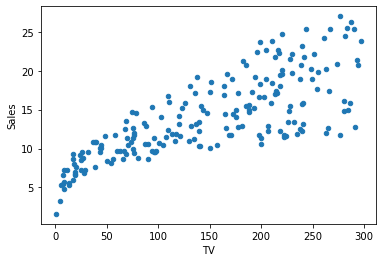

In [32]:
# Simple scatter plot between TV and sales 
df1.plot(kind='scatter',x='TV', y='Sales')
plt.show()

As you can see the simple scatter plot, where we can identify that a high postive correlation, that means, when advertising in TV increases the sales also increasing

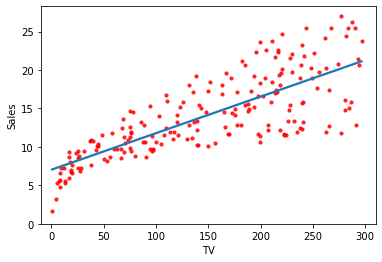

In [35]:
# Plot the relationship between between TV and sales in a DataFrame
sns.regplot(df1.TV, df1.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':10})
plt.xlim(-10,310)
plt.ylim(ymin=0)
plt.show()

The regression plot, it plot the data and a linear regression model fit. From the above graph we can see the scatter plot with least squared fit line, where we can identify that a strong postive linear relationship, that means, when advertising in TV increases the sales also increasing as well.

### 4. Do a correlation analysis on the data set

In [36]:
# correlation matrix of the data set
df1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


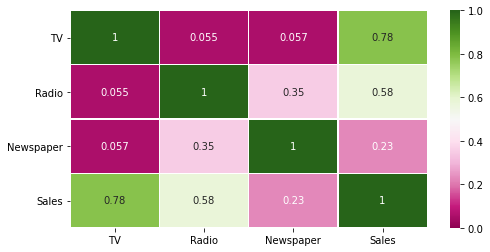

In [45]:
plt.subplots(figsize=(8,4))
sns.heatmap(data=df1.corr(),vmin=0,vmax=1,annot=True,linewidths=0.2,cmap='PiYG')
plt.show()

From the correlation matrix heatmap , we can see that there is strong positive correlation between TV and sales with 0.78. And there is no correlation between TV with Radio and Newspaper , almost zero. The correlation between Radio and sales is moderate positive correlation and there is weak correlation between Newspaper and Sales. 

We can see that sales having the highest correlation so our target variable(Dependent varaiable) should be sales and TV, Radio and newspaper are the independent variables

### 5. Fit a linear regression model on the dataset

#### 1.Simple Linear Regression
##### y=β0+β1x

- y is the response/dependent/target/explained
- x is the feature
- β0 is the intercept
- β1 is the coefficient for x
- Together, β0β0 and β1β1 are called the model coefficients. we must find the values of these coefficients. And once we’ve find these coefficients, we can use the model to predict Sales!

#### Using STATMODELS AND SCIKIT-LEARN packages

In [46]:
### STATSMODELS ###

# create a fitted model
lr1 = smf.ols(formula='Sales ~ TV', data=df1).fit()

# print the coefficients
lr1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [51]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = df1[feature_cols]
y = df1.Sales

# Initiate and fit
lr2 = LinearRegression()
lr2.fit(X, y)

# print the coefficients
print ("Intercept : ",lr2.intercept_)
print ("Co-efficient : ",lr2.coef_)

Intercept :  7.032593549127693
Co-efficient :  [0.04753664]


Both models are successfully fitted the linear regression and model coefficients.
A “unit” increase in TV ad spending is associated with a 0.04753664 “unit” increase in Sales.

Now we can predict the models
- as we know y=β0+β1x
- it becomes y=7.032593+0.04753664x


In [53]:
### STATSMODELS ###

# predicting the observation
lr1.predict(X)

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [54]:
### SCIKIT-LEARN ###

# predicting the observation
lr2.predict(X)

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [55]:
### STATSMODELS ###

# print the p-values for the model coefficients
lr1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

A p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response.

In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales.

we generally don’t consider the p-value for the intercept.

**The most common way to evaluate the overall fit of a linear model is by the R-squared value. 
R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model.
R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.**

In [57]:
### STATSMODELS ###

# print the R-squared value for the model
print("StatModel R-Square Value",lr1.rsquared)

StatModel R-Square Value 0.611875050850071


In [58]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
print("SkLearn R-Square Value",lr2.score(X, y))

SkLearn R-Square Value 0.611875050850071


Both models gives the same good R-squared value

we can check for it for Multiple Linear Regrssion

#### Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:
- y=β0+β1x1+…+βnxn

Each x represents a different feature, and each feature has its own coefficient. In this case:

- y=β0+β1×TV+β2×Radio+β3×Newspaper

In [60]:
### STATSMODELS ###

# create a fitted model with all three features
lr1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df1).fit()

# print the coefficients
lr1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [62]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df1[feature_cols]
y = df1.Sales

# instantiate and fit
lr2 = LinearRegression()
lr2.fit(X, y)

# print the coefficients
print (lr2.intercept_)
print (lr2.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [63]:
# pair the feature names with the coefficients
list(zip(feature_cols, lr2.coef_))

[('TV', 0.04576464545539761),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

For a given amount of Radio and Newspaper ad spending, an increase in TV ad spending is associated with an increase in Sales .

In [64]:
### STATSMODELS ###

# print a summary of the fitted model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        23:32:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no relationship between those features and Sales), and fail to reject the null hypothesis for Newspaper

- TV and Radio ad spending are both positively related with Sales, whereas Newspaper ad spending is slightly negatively related with Sales.

- This multiple linear model has a higher R-squared (0.903) than the simple linear model, which means that this model provides a better fit to the data than a model that only includes TV.

**R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a trustworthy approach for choosing the best linear model. Hence we use adjusted R-square value**

In [67]:
X=df1.drop(['Sales'],axis=1)
y=df1['Sales']

In [68]:
# Now we can split the train and test split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [72]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [74]:
predictions=model.predict(x_test)

In [76]:
print(predictions)

[16.38348211 20.92434957 21.61495426 10.49069997 22.17690456 13.02668085
 21.10309295  7.31813008 13.56732111 15.12238649  8.92494113  6.49924401
 14.30119928  8.77233515  9.58665483 12.09485291  8.59621605 16.25337881
 10.16948105 18.85753401 19.5799036  13.15877029 12.25103735 21.35141984
  7.69607607  5.64686906 20.79780073 11.90951247  9.06581044  8.37295611
 12.40815899  9.89416076 21.42707658 12.14236853 18.28776857 20.18114718
 13.99303029 20.89987736 10.9313953   4.38721626  9.58213448 12.6170249
  9.93851933  8.06816257 13.45497849  5.25769423  9.15399537 14.09552838
  8.71029827 11.55102817]


In [75]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
Name: Sales, dtype: float64


In [81]:
### STATSMODELS ###

print('MSE :',mean_squared_error(y,lr1.predict(X)))

MSE : 2.784126314510936


In [77]:
### SCIKIT-LEARN ###

print('MSE is',mean_squared_error(y_test,predictions))

MSE is 2.8800237300941944


In [78]:
# R squared
model.score(x_test,y_test)

0.8935163320163657

In [79]:
# calculate MAE, MSE, RMSE
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test,predictions))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test,predictions))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

mean_absolute_error : 1.402312498938508
mean_squared_error :  2.8800237300941944
root_mean_squared_error :  1.6970632663793634


MSE is more popular than MAE because MSE “eliminates” larger errors. But, RMSE is even more better than MSE because RMSE is interpretable in the “y” units.

Both the model gives the same variation of data in 89.35% with MSE is slightly different in Statsmodels.